In [1]:
# y = ax**2 + bx + c

# The function is polynomial, but the weight parameters (a,b,c) are linear => 
# it doesn't say what degree x should be => we still can find the best fit of (a,b,c) .

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# load the data
X = []
Y = []
for line in open('data_poly.csv'):
    x, y = line.split(',')
    x = float(x)
    X.append([1, x, x*x]) # add the bias term x0 = 1
    # our model is therefore y_hat = w0 + w1 * x + w2 * x**2
    Y.append(float(y))

# let's turn X and Y into numpy arrays since that will be useful later
X = np.array(X)
Y = np.array(Y)

X[1:5,:]

array([[1.00000000e+00, 9.52735442e+01, 9.07704822e+03],
       [1.00000000e+00, 7.30957232e+01, 5.34298476e+03],
       [1.00000000e+00, 4.69516355e+01, 2.20445607e+03],
       [1.00000000e+00, 3.33137480e+01, 1.10980581e+03]])

Text(0.5, 1.0, "The data we're trying to fit")

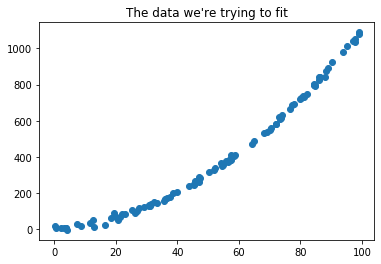

In [11]:
# let's plot the data to see what it looks like
plt.scatter(X[:,1], Y)
plt.title("The data we're trying to fit")

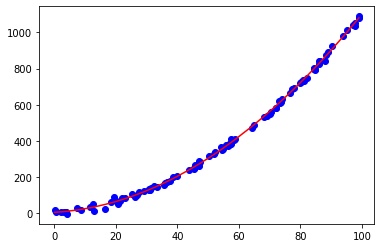

In [8]:
# apply the equations we learned to calculate a and b
# numpy has a special method for solving Ax = b
# so we don't use x = inv(A)*b
# note: the * operator does element-by-element multiplication in numpy
#       np.dot() does what we expect for matrix multiplication
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
Yhat = X.dot(w)

# let's plot everything together to make sure it worked

plt.scatter(X[:,1],Y,color='blue')
plt.plot(sorted(X[:,1]),sorted(Yhat),color='r')



Text(0.5, 1.0, 'Our fitted quadratic')

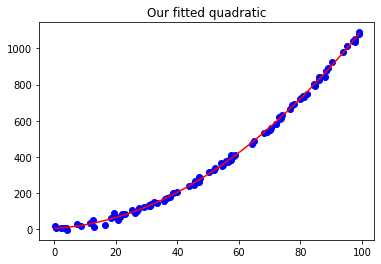

In [19]:
# to plot our quadratic model predictions, let's
# create a line of x's and calculate the predicted y's

plt.scatter(X[:,1],Y,color='blue')

# create 50 equally spaced x points, between min and max of values in the x column
x_line = np.linspace(X[:,1].min(), X[:,1].max(), num=50)

# between each pair of x_line points, there is a straight line. 
# many points => many straight lines visually create a curved line
y_line = w[0] + w[1] * x_line + w[2] * x_line * x_line
plt.plot(x_line, y_line, color = "r")
plt.title("Our fitted quadratic")

In [20]:
# determine how good the model is by computing the r-squared
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("the r-squared is:", r2)

the r-squared is: 0.9991412296366858
